<div>
<img src="./images/octagon_properties.png" width="500"/>
</div>

In [3]:
#library imports
import math
import os
import markdown2

#custom imports
from equipment import equipment
from foundation import open_foundation,surroundings
from object_threeD import object_3d,shape_octagon
from material import concrete,soil,calculate_sbc_gross
from load import vessel_load,load_data
from load_combination import factored_load,load_combination
from nomograph import nomomgraph_value_octagon_diagonal,print_octagon_nomograph
from misc import roundOff

report_html = open("Report/vertes_report.html", "w")
report_html_list = ["<html><head><link rel=\"stylesheet\" href=\"styles.css\"></head><body>"]

pedestal_side = 1.0
foundation_side = 2.0

report_html_list.append(markdown2.markdown("#**VERTVES REPORT**"))
report_html_list.append(markdown2.markdown("##INPUT"))
report_html_list.append(markdown2.markdown("###GEOMETRY"))

pedestal = object_3d("octagon",pedestal_side)
foundation = object_3d("octagon",foundation_side)

pedestal.material = concrete
pedestal.top_elevation = 3.0
pedestal.bottom_elevation = 2.0
pedestal.water_elevation = 0.5

foundation.material = concrete
foundation.top_elevation = pedestal.bottom_elevation
foundation.bottom_elevation = 0
foundation.water_elevation = 0.5

equipment = equipment()
openFoundation = open_foundation(pedestal,foundation)
surroundings = surroundings(1.5,1,0.5)

sbc_net = soil.property.soil_capacity
weight_of_footing = openFoundation.foundation.weight()
weight_of_pedestal = openFoundation.pedestal.weight()

foundation_area = openFoundation.foundation.shape_object.area()
pedestal_area = openFoundation.pedestal.shape_object.area()
soil_area = max(foundation_area - pedestal_area,0)
foundation_section_modulus = openFoundation.foundation.shape_object.section_modulus_major()

soil_height = max(surroundings.natural_ground_level - openFoundation.foundation.bottom_elevation,0)
weight_of_soil = soil_area * soil_height * soil.density
shear_lever = openFoundation.pedestal.top_elevation - openFoundation.foundation.bottom_elevation
weight_total = weight_of_soil + weight_of_footing + weight_of_pedestal
foundation_width = openFoundation.foundation.shape_object.side * shape_octagon.side_diameter_factor

report_html_list.append(markdown2.markdown("####PEDESTAL"))
report_html_list.extend(openFoundation.pedestal.properties_report())

report_html_list.append(markdown2.markdown("####FOUNDATION"))
report_html_list.extend(openFoundation.foundation.properties_report())

report_html_list.append(markdown2.markdown("####SOIL"))
#REPORT SOIL DATA

report_html_list.append(markdown2.markdown("###SITE"))
#REPORT SURROUDINGS DATA


<div>
<img src="./images/octagon_nomograph.png" width="800"/>
</div>

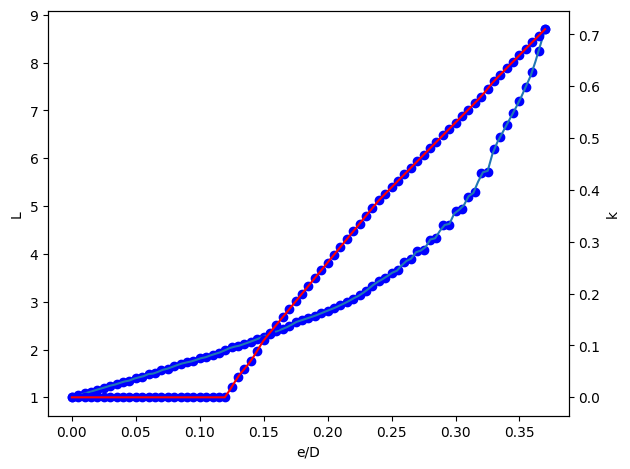

In [4]:
vessel_load.empty_load = load_data(1,1,1,1,1,1)
vessel_load.erection_load = load_data(1,1,1,1,1,1)
vessel_load.operating_load = load_data(1,1,1,1,1,1)
vessel_load.testing_load = load_data(1,1,1,1,1,1)
vessel_load.wind_load = load_data(1,1,1,1,1,1)
vessel_load.seismic_dbe = load_data(1,1,1,1,1,1)
vessel_load.seismic_mce = load_data(1,1,1,1,1,1)

inbuilt_factored_loads_1 = []
inbuilt_factored_loads_1.append(factored_load(1,vessel_load.empty_load))
inbuilt_load_combination_1 = load_combination(load_ID="1001",loads=inbuilt_factored_loads_1,sbc_increase=1.5,reinforcement_factor=1.5,factor_of_safety_overturning=1.5,factor_of_safety_sliding=2.0)

inbuilt_factored_loads_2 = []
inbuilt_factored_loads_2.append(factored_load(1,vessel_load.empty_load))
inbuilt_factored_loads_2.append(factored_load(1,vessel_load.wind_load))
inbuilt_load_combination_2 = load_combination(load_ID="1002",loads=inbuilt_factored_loads_2,sbc_increase=1.5,reinforcement_factor=1.5,factor_of_safety_overturning=1.5,factor_of_safety_sliding=2.0)

inbuilt_factored_loads_3 = []
inbuilt_factored_loads_3.append(factored_load(1,vessel_load.operating_load))
inbuilt_load_combination_3 = load_combination(load_ID="1003",loads=inbuilt_factored_loads_3,sbc_increase=1.5,reinforcement_factor=1.5,factor_of_safety_overturning=1.5,factor_of_safety_sliding=2.0)

inbuilt_factored_loads_4 = []
inbuilt_factored_loads_4.append(factored_load(1,vessel_load.operating_load))
inbuilt_factored_loads_4.append(factored_load(1,vessel_load.wind_load))
inbuilt_load_combination_4 = load_combination(load_ID="1004",loads=inbuilt_factored_loads_4,sbc_increase=1.5,reinforcement_factor=1.5,factor_of_safety_overturning=1.5,factor_of_safety_sliding=2.0)

inbuilt_load_combinations = []
inbuilt_load_combinations.append(inbuilt_load_combination_1)
inbuilt_load_combinations.append(inbuilt_load_combination_2)
inbuilt_load_combinations.append(inbuilt_load_combination_3)
inbuilt_load_combinations.append(inbuilt_load_combination_4)

print_octagon_nomograph()

report_html_list.append(markdown2.markdown("###LOADS"))
report_html_list.append(markdown2.markdown("###NOMOGRAPH"))
report_html_list.append(markdown2.markdown("![Nomograph](nomograph.png)"))
report_html_list.append(markdown2.markdown("###LOAD COMBINATIONS AND CALCULATIONS"))

sbc_gross : dict = {}
report_html_list_i = []
report_html_list_i.append("| Load ID  | SBC Gross | Axial | Shear | Moment | E/D | L | k | PMax | PMin | FOSO | FOSS" )
report_html_list_i.append("|---| --- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |")

markdown2.markdown(text="\n".join(report_html_list), extras=["tables"])

for i in range(len(inbuilt_load_combinations)): 

    inbuilt_load_combinations_i : load_combination = inbuilt_load_combinations[i] 
    inbuilt_load_combinations_i.calculate_total_load()
    sbc_gross_i = calculate_sbc_gross(sbc_net,surroundings.natural_ground_level,openFoundation.foundation.bottom_elevation,surroundings.water_level,soil.density,soil.sub_water_density,inbuilt_load_combinations_i.sbc_increase)
    sbc_gross[inbuilt_load_combinations_i.load_ID] = sbc_gross_i
    
    axial_i = inbuilt_load_combinations_i.factored_loads_total.axial + weight_total
    shear_i = inbuilt_load_combinations_i.factored_loads_total.shear
    moment_i = inbuilt_load_combinations_i.factored_loads_total.moment + abs(shear_i * shear_lever)
    eccentricity_i = moment_i/axial_i
    e_dividedBy_D_i = eccentricity_i/foundation_width

    L_i,k_i,within_nomograph = nomomgraph_value_octagon_diagonal(e_dividedBy_D_i)
    pmax_i = axial_i / foundation_area + moment_i / foundation_section_modulus
    pmin_i = axial_i / foundation_area - moment_i / foundation_section_modulus

    if(pmin_i<0):
        pmax_i = L_i * axial_i / foundation_area
        pmin_i = 0

    FOSO_i = axial_i * soil.property.coeff_friction / shear_i
    FOSS_i = axial_i * foundation_width / 2 / moment_i
    #WITHIN NOMOGRAPH CHECK, FOSS CHECK, FOSO CHECK , CONTACT AREA CHECK , NO TENSION CHECK

    report_html_list_i.append("|" + inbuilt_load_combinations_i.load_ID +  " | " + roundOff(sbc_gross_i) + " |" + roundOff(axial_i) + " |" + roundOff(shear_i) + " |" + roundOff(moment_i) + " |" + roundOff(e_dividedBy_D_i) + " |" + roundOff(L_i) + " |" + roundOff(k_i) + " |" + roundOff(pmax_i) + " |" + roundOff(pmin_i) + " |" + roundOff(FOSO_i) + " |" + roundOff(FOSO_i) + " |" )

report_html_list.append(markdown2.markdown(text="\n".join(report_html_list_i), extras=["tables"]))

report_html_list.append("</html></body>")
report_html.writelines(report_html_list)
report_html.close()
